This notebook plots the 

In [37]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
from os.path import join
import numpy as np
import matplotlib as mpl
mpl.style.use('../../style.mcstyle')   # noqa
from matplotlib import pyplot as plt
import astropy
import pandas as pd
from astropy.io import fits
from tqdm import tqdm
import h5py
mpl.rcParams['xtick.top'] = False
mpl.rcParams['ytick.right'] = False

from astropy.cosmology import Planck18
cosmo = Planck18

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
wdir = '/anvil/scratch/x-mho1/cmass-ili'
imdir = './figures'

## From Ana Maria's runs

In [39]:
import torch

filename = '/anvil/projects/x-phy240043/x-mho1/cmass-final/inference/mtng/MTNG_ensmble_model_dictionary_top10avgomsig8_PkQk_{extendedHOD}_kmax0.4.pt'
model_dict = torch.load(filename, map_location='cpu', weights_only=False)
print('\n'.join(list(model_dict.keys())))

Trained_posterior_ensemble_model
Trained_model_summaries
Model_names_hyperparams
Single_posterior_samples_pandas_dataframe


In [40]:
samples = model_dict['Single_posterior_samples_pandas_dataframe']
samples = samples.rename(columns={
    '$\\Omega_{\\rm m}$': '$\\Omega_m$',
    '$\\Omega_{\\rm b}$': '$\\Omega_b$',
    '$h$': '$h$',
    '${\\rm n_s}$': '$n_s$',
    '$\\sigma{8}$': '$\\sigma_8$'
})
samples.shape

(1000, 21)

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 18 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'G', 'M', 'N', 'T', 'eight', 'five', 'four', 'nine', 'nonmarkingreturn', 'one', 'period', 'seven', 'six', 'space', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 21, 23, 24, 25, 26, 27, 28, 42, 48, 49, 55]
INFO:fontTools.subset:Closed glyph list over 'MATH': 18 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'G', 'M', 'N', 'T', 'eight', 'five', 'four', 'nine', 'nonmarkingreturn', 'one', 'period', 'seven', 'six', 'space', 'two', 'zero']
INFO:fontTo

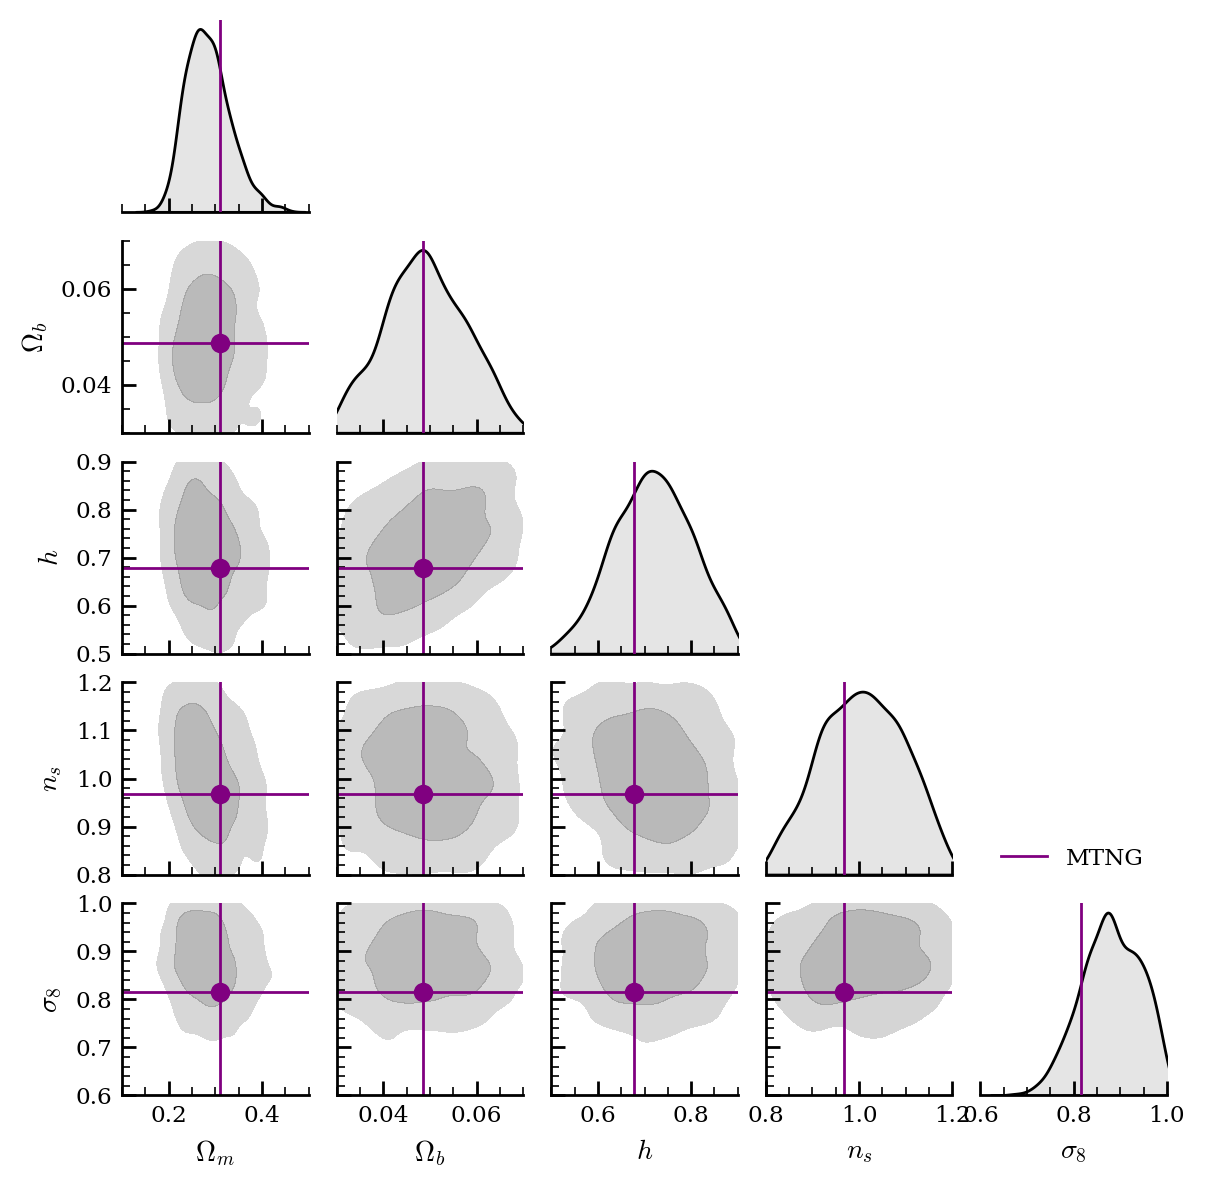

In [ ]:

import seaborn as sns


def plot_true_vals(grid, true_vals, **kwargs):
    for i, val in enumerate(true_vals):
        grid.diag_axes[i].axvline(val, **kwargs)
        for j, ax in enumerate(grid.axes[i, :i]):
            if ax:
                ax.axvline(true_vals[j], **kwargs)
                ax.axhline(val, **kwargs)
                ax.plot(true_vals[j], val, 'o', **kwargs)


def set_boundaries(grid, prior_range):
    for i, (x, y) in enumerate(prior_range):
        grid.diag_axes[i].set_xlim(x, y)
        for j, ax in enumerate(grid.axes[i, :i]):
            if ax:
                ax.set_ylim(x, y)
                ax.set_xlim(*prior_range[j])


names = samples.columns[:5]
yrange = [
    [0.1, 0.5],
    [0.03, 0.07],
    [0.5, 0.9],
    [0.8, 1.2],
    [0.6, 1]]
ytrue = [0.3089, 0.0486, 0.6774, 0.9667, 0.8159]

g = sns.pairplot(
    samples,
    vars=names,
    kind='kde',
    plot_kws={
        'alpha': 0.5, 'levels': [0.05, 0.36, 1], 'fill': True,
        'common_norm': False, 'color': 'k'},
    diag_kws={'color': 'k', 'alpha': 0.1, 'fill': True},
    corner=True,
    height=1.2,
)
g.fig.subplots_adjust(wspace=0.15, hspace=0.15)

plot_true_vals(g, ytrue, color='purple', lw=1, label='MTNG')
set_boundaries(g, yrange)
g.diag_axes[-1].legend(loc='upper left', bbox_to_anchor=(0., 1.4))


g.savefig(join(imdir, 'mtng_cosmo_posterior.pdf'), dpi=300, bbox_inches='tight')